# Dimensionality Reduction Using Autoencoders


In [21]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 


from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

In [22]:
dataset = pd.read_csv("/content/drive/MyDrive/CGM/HIGGS_6M.csv")
print(dataset)

         1.000000000000000000e+00  ...  8.766783475875854492e-01
0                             1.0  ...                  0.798343
1                             1.0  ...                  0.780118
2                             0.0  ...                  0.957904
3                             1.0  ...                  0.808487
4                             0.0  ...                  0.957818
...                           ...  ...                       ...
5999994                       0.0  ...                  0.655532
5999995                       1.0  ...                  0.925974
5999996                       0.0  ...                  0.838066
5999997                       1.0  ...                  1.288571
5999998                       1.0  ...                  1.780451

[5999999 rows x 29 columns]


In [23]:
dataset_1 = dataset[5990000:]
dataset = dataset[5500000:]

In [4]:
dataset.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,-6.536741852760314941e-01,9.303491115570068359e-01,1.107436060905456543e+00,1.138904333114624023e+00,-1.578198313713073730e+00,-1.046985387802124023e+00,0.000000000000000000e+00.1,6.579295396804809570e-01,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
5500000,0.0,0.705134,-1.569118,-0.108439,0.769991,-1.411689,0.617249,-0.578320,1.417144,2.173076,0.986076,-1.706643,0.426564,0.000000,0.813478,-0.696167,-1.552349,1.274112,0.792777,-2.118330,-0.758277,0.000000,1.111075,1.055990,0.989417,0.930553,0.403091,0.833745,0.748976
5500001,1.0,1.397457,-0.471455,-0.992336,1.238193,-1.277894,1.179809,-1.212067,0.838376,2.173076,0.671695,-1.010168,-0.174420,2.214872,0.663673,-1.978708,0.582932,0.000000,0.783284,-1.265519,-1.184449,0.000000,0.838025,0.915485,0.979878,0.831077,1.043992,1.038387,0.868183
5500002,0.0,1.690638,-0.288349,1.156193,0.574144,0.278159,0.503015,0.785227,0.924305,2.173076,0.955859,-0.102905,-1.314043,2.214872,1.515261,-1.800299,0.083116,0.000000,1.433181,1.172154,-0.566277,0.000000,0.859003,0.949884,0.985574,0.955686,1.034921,0.778508,0.877355
5500003,1.0,0.664323,1.659589,-1.276980,0.157728,0.077926,1.434935,0.229708,-1.553859,2.173076,2.071742,0.094284,-0.115608,2.214872,1.742164,0.589104,0.236223,0.000000,1.654438,-1.462898,-1.637812,0.000000,0.952673,1.179198,0.998562,0.915051,2.448421,1.472814,1.157226
5500004,1.0,0.559459,-0.688650,0.519212,0.984362,-1.433873,0.875032,-1.403181,-1.099271,2.173076,1.094227,-1.141304,0.292850,0.000000,0.985060,-1.944118,0.567954,0.000000,1.203162,-1.029830,-0.358737,3.101961,0.885789,0.783384,1.009930,0.804765,0.679642,0.851377,0.793959


In [24]:
Y=dataset['1.000000000000000000e+00']
X=dataset.drop('1.000000000000000000e+00',axis=1)
y=dataset_1['1.000000000000000000e+00']
x=dataset_1.drop('1.000000000000000000e+00',axis=1)

In [ ]:

def tsne_plot(x, y):
      
    # Setting the plotting background
    sns.set(style ="whitegrid")
      
    tsne = TSNE(n_components = 2, random_state = 0)
      
    # Reducing the dimensionality of the data
    X_transformed = tsne.fit_transform(x)
  
    plt.figure(figsize =(12, 8))
      
    # Building the scatter plot
    plt.scatter(X_transformed[np.where(y == 0), 0], 
                X_transformed[np.where(y == 0), 1],
                marker ='o', color ='r', linewidth ='1',
                alpha = 0.8, label ='0')
    plt.scatter(X_transformed[np.where(y == 1), 0],
                X_transformed[np.where(y == 1), 1],
                marker ='o', color ='b', linewidth ='1',
                alpha = 0.8, label ='1')
  
    # Specifying the location of the legend
    plt.legend(loc ='best')
      
    # Plotting the reduced data
    plt.show()

**Visualizing the last 10k data using the t-distributed Stochacstic neighbour embedding (t-SNE)**

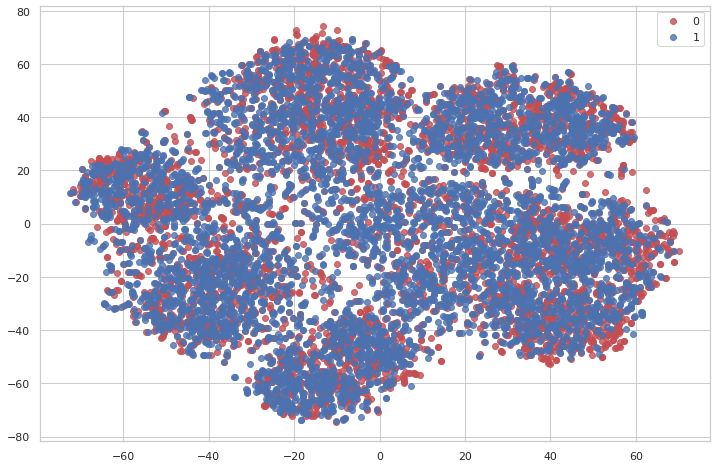

In [ ]:
tsne_plot(x,y)

In [25]:
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled_0 = X_scaled[Y == 0]
X_scaled_1 = X_scaled[Y == 1]

In [7]:
print(X_scaled)

[[0.05380304 0.17780001 0.46878638 ... 0.03038571 0.06504171 0.06060836]
 [0.14034084 0.4032     0.21521159 ... 0.08633721 0.09151035 0.08043286]
 [0.17698729 0.44079999 0.83158739 ... 0.08554537 0.05789732 0.08195823]
 ...
 [0.03133936 0.60639999 0.39492679 ... 0.13589561 0.08033999 0.0754243 ]
 [0.01724808 0.8904     0.74785864 ... 0.07427541 0.14069827 0.15034493]
 [0.16337642 0.23440002 0.88793717 ... 0.06565275 0.19138539 0.23214642]]


**Constructing the Autoencoder**

In [26]:

# Building the Input Layer
input_layer = Input(shape =(X.shape[1], ))
  
# Building the Encoder network
encoded = Dense(25, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(22, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(19, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(16, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(13, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)                
encoded = Dense(10, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(7, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)

encoded = Dense(5, activation ='relu')(encoded)   ## latent space
  
# Building the Decoder network
decoded = Dense(7, activation ='relu')(encoded)
decoded = Dense(10, activation ='relu')(decoded)
decoded = Dense(13, activation ='relu')(decoded)
decoded = Dense(16, activation ='relu')(decoded)
decoded = Dense(19, activation ='relu')(decoded)
decoded = Dense(22, activation ='relu')(decoded)
decoded = Dense(25, activation ='relu')(decoded)
  
# Building the Output Layer
output_layer = Dense(X.shape[1], activation ='relu')(decoded)

In [27]:
import tensorflow as tf

**Training the Autoencoder**

In [28]:
autoencoder = Model(input_layer, output_layer)





autoencoder.compile(optimizer = "adam", loss ="mse",metrics=['accuracy'])

# Early stopping to avoid overfitting

callback = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
  
# Training the Auto-encoder network
autoencoder.fit(X_scaled_0, X_scaled_0, 
                batch_size = 32, epochs = 50, 
                shuffle = True, validation_split = 0.20,callbacks=[callback])

Epoch 1/50
5874/5874 [==============================] - 16s 3ms/step - loss: 0.0590 - accuracy: 0.5241 - val_loss: 0.0327 - val_accuracy: 0.5734
Epoch 2/50
5874/5874 [==============================] - 15s 2ms/step - loss: 0.0315 - accuracy: 0.6277 - val_loss: 0.0296 - val_accuracy: 0.5956
Epoch 3/50
5874/5874 [==============================] - 15s 3ms/step - loss: 0.0292 - accuracy: 0.6435 - val_loss: 0.0298 - val_accuracy: 0.6598
Epoch 4/50
5874/5874 [==============================] - 15s 2ms/step - loss: 0.0281 - accuracy: 0.6348 - val_loss: 0.0271 - val_accuracy: 0.5695
Epoch 5/50
5874/5874 [==============================] - 14s 2ms/step - loss: 0.0271 - accuracy: 0.6323 - val_loss: 0.0274 - val_accuracy: 0.5967
Epoch 6/50
5874/5874 [==============================] - 15s 2ms/step - loss: 0.0267 - accuracy: 0.6315 - val_loss: 0.0265 - val_accuracy: 0.5744
Epoch 7/50
5874/5874 [==============================] - 15s 3ms/step - loss: 0.0260 - accuracy: 0.6325 - val_loss: 0.0260 - val_ac

In [29]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])
hidden_representation.add(autoencoder.layers[5])
hidden_representation.add(autoencoder.layers[6])
hidden_representation.add(autoencoder.layers[7])


In [30]:
hidden_rep_0 = hidden_representation.predict(X_scaled_0)
hidden_rep_1 = hidden_representation.predict(X_scaled_1)
  
# Combining the encoded points into a single table 
encoded_X = np.append(hidden_rep_0, hidden_rep_1, axis = 0)
y_0 = np.zeros(hidden_rep_0.shape[0])
y_1 = np.ones(hidden_rep_1.shape[0])
encoded_y = np.append(y_0, y_1)
  


In [31]:
## Splitting the encoded data
X_train_encoded, X_test_encoded, Y_train_encoded, Y_test_encoded = train_test_split(encoded_X, encoded_y, test_size = 0.2)
## Splitting the original data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

**Tuning the Hyperparamters for LightGBM Classifier**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
rs_params = {

        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'n_estimators': (200,400,600,800,1000)

}
# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), param_distributions=rs_params, cv = 2, n_iter=100,verbose=2,n_jobs=-1)

# Train on training data-
rs_cv.fit(X_train_encoded, Y_train_encoded,verbose=1)


After appyling dimensionality reduction the features have been reduced to 7


In [ ]:
X_train_encoded.shape[1]

7

In [ ]:
rs_cv.best_params_

{'bagging_fraction': 0.8,
 'bagging_frequency': 5,
 'feature_fraction': 0.8,
 'max_depth': 10,
 'min_data_in_leaf': 90,
 'n_estimators': 600}

In [32]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier(num_leaves=71,bagging_fraction=0.8,bagging_frequency=5,feature_fraction=0.8,max_depth=10,min_data_in_leaf=90,n_estimators=600)
classifier.fit(X_train_encoded, Y_train_encoded)

LGBMClassifier(bagging_fraction=0.8, bagging_frequency=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=90, min_split_gain=0.0, n_estimators=600,
               n_jobs=-1, num_leaves=71, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [33]:
Y_pred_encoded=classifier.predict(X_test_encoded)

cm = confusion_matrix(Y_test_encoded, Y_pred_encoded)
print(cm)
accuracy_score(Y_test_encoded, Y_pred_encoded)

[[20801 26021]
 [14648 38530]]


0.59331

In [34]:
r_probs = [0 for _ in range(len(Y_test_encoded))]
classifier_probs = classifier.predict_proba(X_test_encoded)

In [35]:
classifier_probs = classifier_probs[:, 1]


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

In [37]:
r_auc = roc_auc_score(Y_test_encoded, r_probs)
classifier_auc = roc_auc_score(Y_test_encoded, classifier_probs)

In [38]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Light GBM : AUROC = %.3f' % (classifier_auc))

Random (chance) Prediction: AUROC = 0.500
Light GBM : AUROC = 0.619


In [39]:
r_fpr, r_tpr, _ = roc_curve(Y_test_encoded, r_probs)
classifier_fpr, classifier_tpr, _ = roc_curve(Y_test_encoded, classifier_probs)

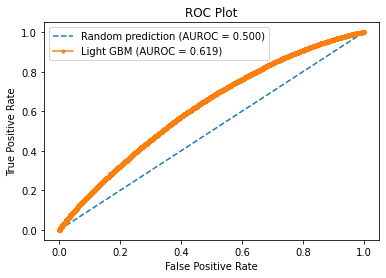

In [40]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(classifier_fpr, classifier_tpr, marker='.', label='Light GBM (AUROC = %0.3f)' % classifier_auc)




# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()